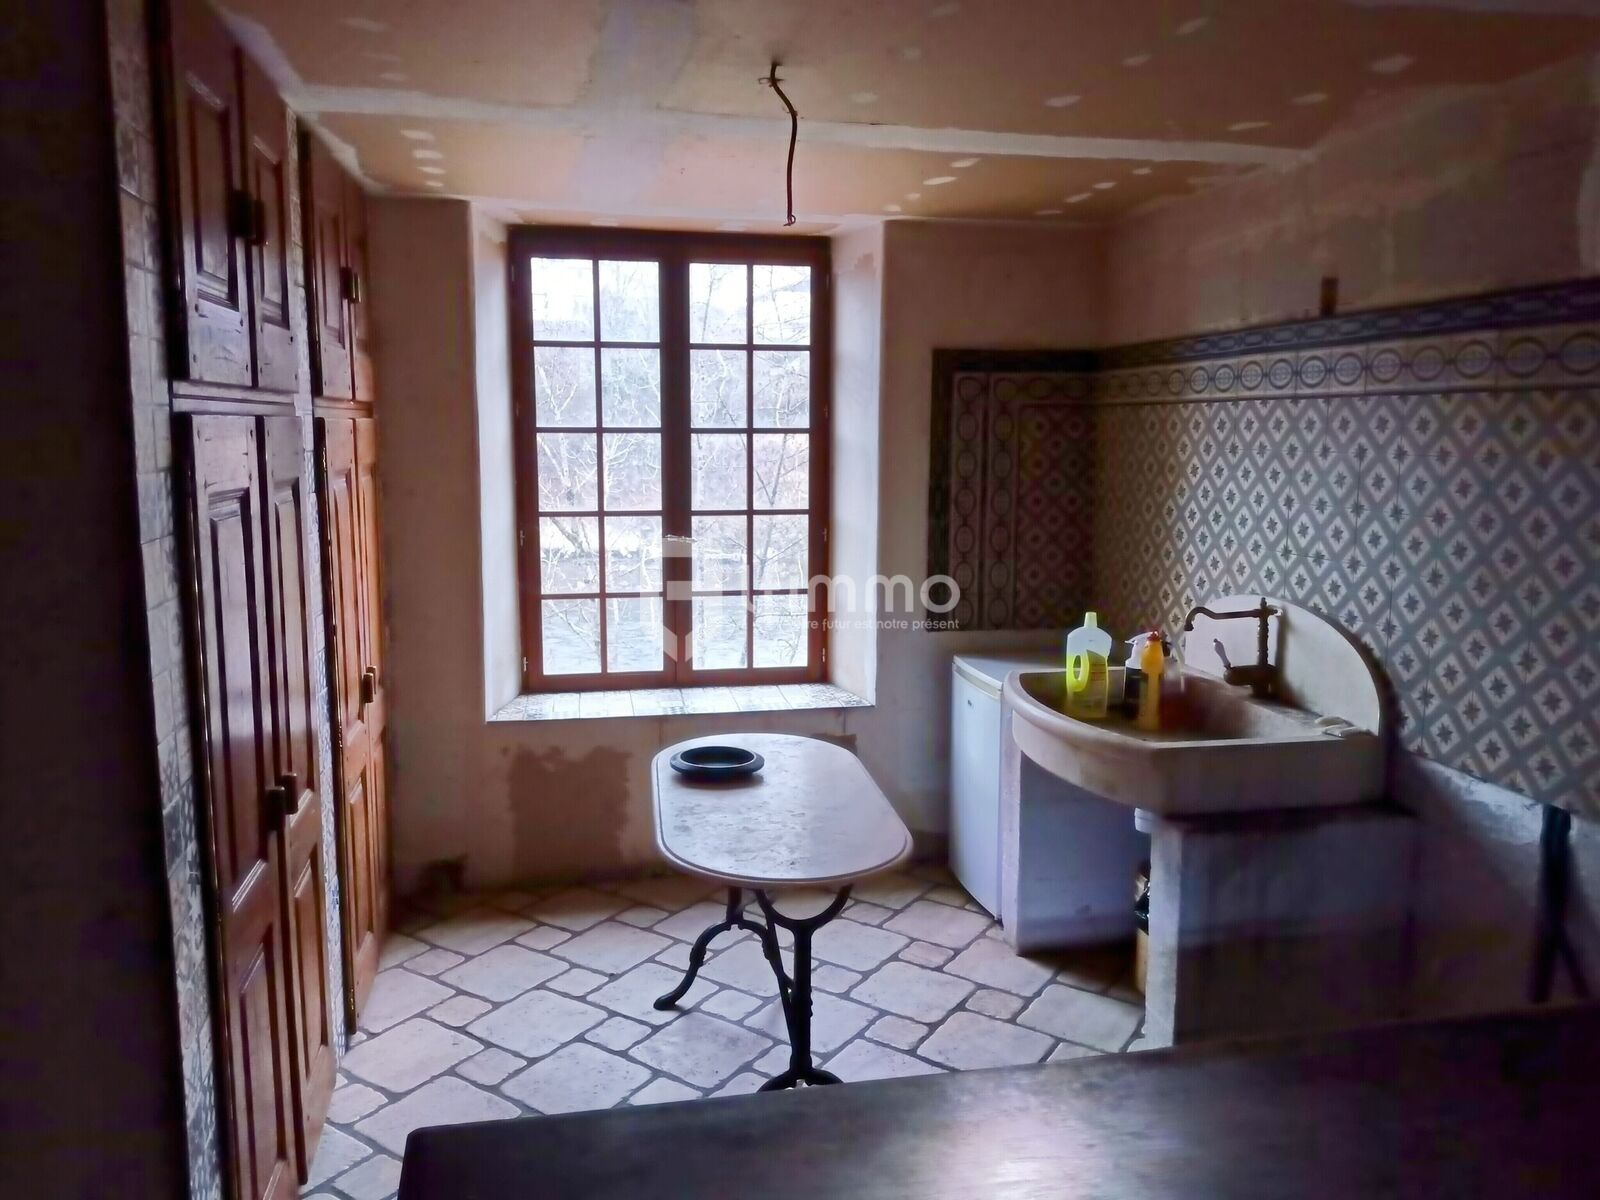

In [52]:
import os
from diffusers.utils import load_image
import json
import torch
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

thefile = "../data/1.jpg"

theimage = load_image(thefile)


theimage



In [ ]:
def load_info():
    infopath = "../data/output/1.json"
    with open(infopath, "r") as f:
        info = json.load(f)
    return info

def load_mask():
    maskpath = "../data/output/1_semantic_masks.pt"
    mask = torch.load(maskpath)
    return mask

info = load_info()
masks = load_mask()


In [ ]:
image_np = np.array(theimage)  # shape (H, W, 3), dtype uint8

fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(image_np)
ax.axis('off')

color_rgb = [(255, 0, 0), (0, 255, 0), (0, 0, 255), (255, 255, 0), (0, 255, 255), (255, 0, 255), (255, 255, 255), (0, 0, 0), (255, 165, 0), (128, 0, 128)]
color_name = ["red", "green", "blue", "yellow", "cyan", "magenta", "white", "black", "orange", "purple"]

# Overlay each mask
for i, m in enumerate(masks):
    m_np = m.cpu().numpy()        # shape (H, W), values 0 or 1
    H, W = m_np.shape

    # pick a random RGB color
    color = color_rgb[i%len(color_rgb)]
    print(f"{color_name[i%len(color_name)]} : {info['semantic_class_names'][i]}")

    # build an RGBA image where the mask pixels get that color+alpha
    alpha = 0.4  # you can vary this per-mask if you like
    overlay = np.zeros((H, W, 4), dtype=np.uint8)
    overlay[..., :3] = color
    overlay[...,  3] = (m_np * alpha * 255).astype(np.uint8)

    ax.imshow(overlay, interpolation='none')

plt.tight_layout()
plt.show()

In [ ]:
walls = info["semantic_class_names"].index("wall")
walls_mask = masks[walls]

walls



# save the walls mask :
walls_mask_path = "../data/output/1_walls_mask.png"
Image.fromarray(walls_mask.cpu().numpy() * 255).save(walls_mask_path)




In [54]:
floor = info["semantic_class_names"].index("floor")
floor_mask = masks[floor]

floor_mask_path = "../data/output/1_floor_mask.png"
Image.fromarray(floor_mask.cpu().numpy() * 255).save(floor_mask_path)



In [ ]:
ceiling = info["semantic_class_names"].index("ceiling")


ceiling_mask = masks[ceiling]

# combine wall, floor and ceiling masks :
combined_mask = walls_mask | floor_mask | ceiling_mask

# save the combined mask :
combined_mask_path = "../data/output/1_combined_mask.png"
Image.fromarray(combined_mask.cpu().numpy() * 255).save(combined_mask_path)

